import essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Download the data set and load the csv file. Displaying basic structure and information of the data

In [2]:
data = pd.read_csv('Multi-Year Price Data.csv', parse_dates=['Date'])
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 2 columns):
Date     1476 non-null datetime64[ns]
Price    1476 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 23.2 KB


,Price
count,1476.000000
mean,114.102981
std,20.482524
min,81.000000
25%,99.000000
50%,111.500000
75%,124.000000
max,281.000000


In [3]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['weekday'] = data['Date'].dt.day_name()

# 1. Create a visualization/chart that makes it easy to find if there are any year over year repeating patterns in the data?

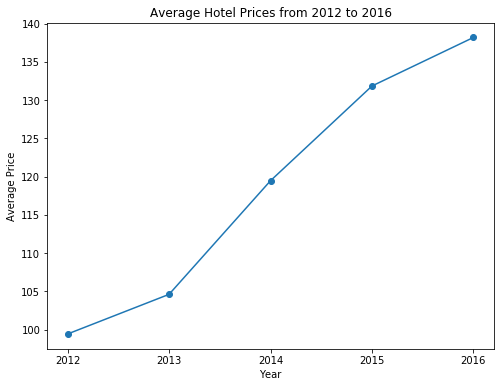

In [4]:
average_prices = data.groupby('year')['Price'].mean()
average_prices.head()
plt.figure(figsize=(8, 6))
plt.plot(average_prices.index, average_prices.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.gca().set_xticks(data["year"].unique())
plt.title('Average Hotel Prices from 2012 to 2016')
plt.show()

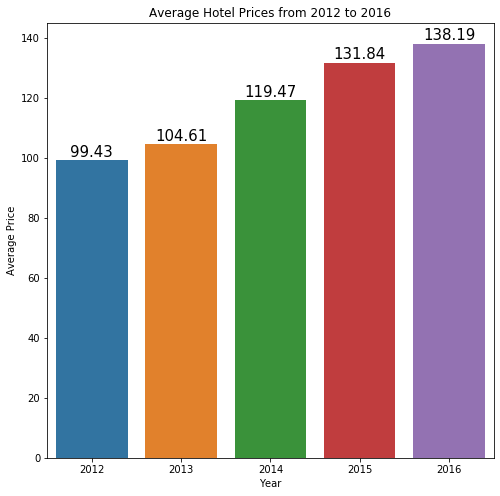

In [5]:
df = pd.DataFrame({'year':average_prices.index, 'Price':average_prices.values})
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="year", y="Price", data=df)
 
# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Hotel Prices from 2012 to 2016')
plt.show()

From this we can see there is steady  increase in average price of the hotel each year

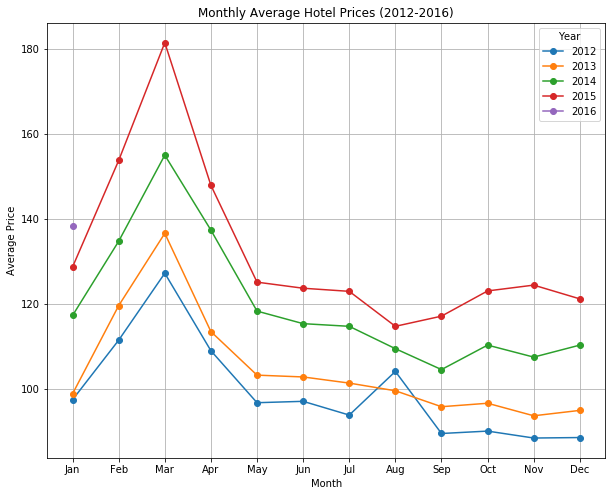

In [6]:

# Group the data by year and month and calculate the average price for each month
monthly_prices = data.groupby(['year', 'month'])['Price'].mean().unstack()

# Create a grouped bar chart
plt.figure(figsize=(10, 8))
x = monthly_prices.columns
for year in monthly_prices.index:
    plt.plot(x, monthly_prices.loc[year], marker='o', label=year)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Monthly Average Hotel Prices (2012-2016)')
plt.xticks(x, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()


## From the above graph we can see some repeating pattern every year.
1. From Jan to March there is high increase in the hotel pricing.
2. Month of march Records the highest pricing.
3. Steep decrease in the month of April-May
4. Stagnant (Not very much peak increase/decrese) in june-dec with some fluctuations in month of august.
Oct to jan seems to have a an average pricing.

In [7]:
print(monthly_prices)

month          1           2           3           4           5           6   \
year                                                                            
2012    97.451613  111.448276  127.193548  108.966667   96.741935   97.066667   
2013    98.838710  119.571429  136.580645  113.466667  103.225806  102.800000   
2014   117.258065  134.714286  154.967742  137.333333  118.290323  115.333333   
2015   128.677419  153.714286  181.419355  147.866667  125.096774  123.666667   
2016   138.187500         NaN         NaN         NaN         NaN         NaN   

month          7           8           9           10          11          12  
year                                                                           
2012    93.833333  104.096774   89.500000   90.064516   88.433333   88.548387  
2013   101.354839   99.548387   95.800000   96.612903   93.666667   94.935484  
2014   114.709677  109.451613  104.533333  110.290323  107.466667  110.290323  
2015   122.935484  114.709677  1

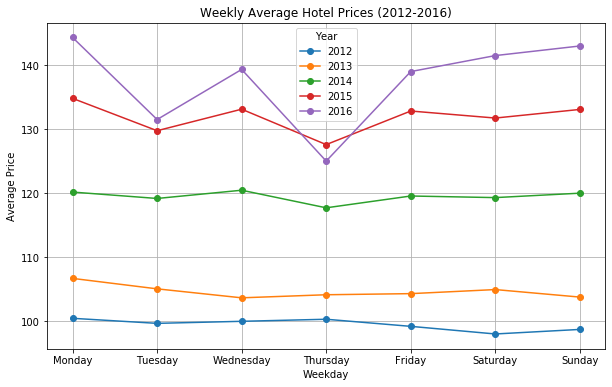

In [8]:
week_prices = data.groupby(['year', 'weekday'])['Price'].mean().unstack()

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
x = week_prices.columns
for year in week_prices.index:
    plt.plot(x, week_prices.loc[year], marker='o', label=year)
plt.xlabel('Weekday')
plt.ylabel('Average Price')
plt.title('Weekly Average Hotel Prices (2012-2016)')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

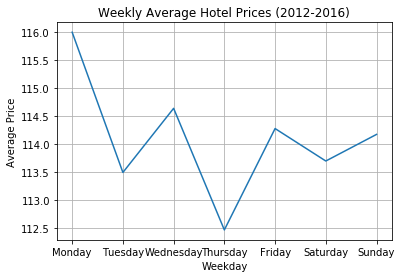

In [9]:
weekly_prices = data.groupby('weekday')['Price'].mean()
plt.plot(weekly_prices.index, weekly_prices.values)
plt.xlabel('Weekday')
plt.ylabel('Average Price')
plt.title('Weekly Average Hotel Prices (2012-2016)')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()

## From the above graph we can see some repeating pattern every year.
1. Monday Records the highest pricing in average.
2. Weekend i.e From Friday to Monday we can some increase in pricing strategy.
3. Mid of week i.e Tue-Thu have decrease in price.
4. Thursday records lowest pricing.

# 2. Identify any outliers in the data visually and programmatically? 

C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


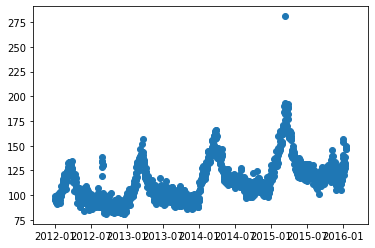

In [10]:
plt.scatter(data.Date, data.Price)
# Here we can see that in year 2015 the price is around 280 which is abnormal with the price distribution

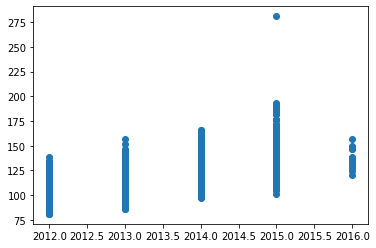

In [11]:
plt.scatter(data.year, data.Price)

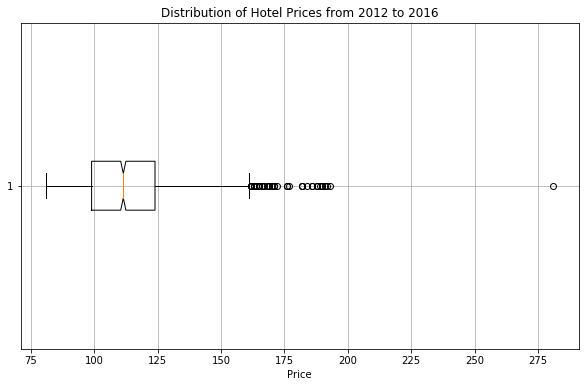

In [12]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['Price'], notch=True, vert=False)
plt.xlabel('Price')
plt.title('Distribution of Hotel Prices from 2012 to 2016')
plt.grid(True)
plt.show()

In [13]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

# Find outliers
outliers = data[(data['Price'] < lower_bound) | (data['Price'] > upper_bound)]

# Display the outliers
print(outliers)


61.5 161.5
           Date  Price  year  month    weekday
807  2014-03-19    163  2014      3  Wednesday
809  2014-03-21    165  2014      3     Friday
810  2014-03-22    162  2014      3   Saturday
814  2014-03-26    166  2014      3  Wednesday
815  2014-03-27    162  2014      3   Thursday
816  2014-03-28    166  2014      3     Friday
1138 2015-02-13    163  2015      2     Friday
1139 2015-02-14    165  2015      2   Saturday
1142 2015-02-17    164  2015      2    Tuesday
1148 2015-02-23    163  2015      2     Monday
1151 2015-02-26    165  2015      2   Thursday
1152 2015-02-27    165  2015      2     Friday
1153 2015-02-28    169  2015      2   Saturday
1154 2015-03-01    162  2015      3     Sunday
1155 2015-03-02    167  2015      3     Monday
1156 2015-03-03    171  2015      3    Tuesday
1157 2015-03-04    170  2015      3  Wednesday
1158 2015-03-05    168  2015      3   Thursday
1159 2015-03-06    190  2015      3     Friday
1160 2015-03-07    184  2015      3   Saturday
11

#   3. Estimate the hotel prices for each day in Feb 2022

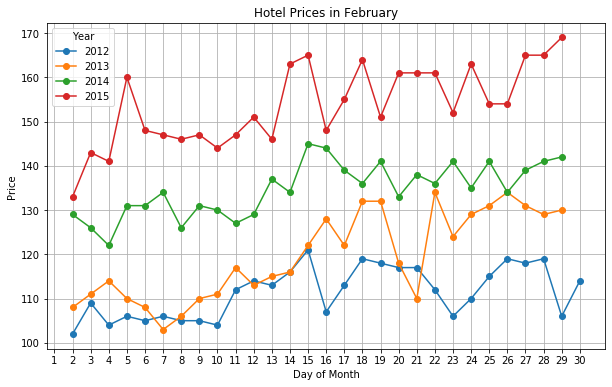

In [14]:
february_data = data[data['Date'].dt.month == 2]

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each year in the data
for year in february_data['Date'].dt.year.unique():
    # Filter the data for the specific year
    year_data = february_data[february_data['Date'].dt.year == year]
    # Extract the day of the month and the price
    day_of_month = year_data['Date'].dt.day
    prices = year_data['Price']
    # Plot the prices for each day
    ax.plot(day_of_month, prices, marker='o', label=str(year))

# Set the x-axis and y-axis labels
ax.set_xlabel('Day of Month')
ax.set_ylabel('Price')
plt.xticks(range(30), [i for i in range(1,31)])
ax.set_title('Hotel Prices in February')

# Add a legend and gridlines
ax.legend(title='Year')
ax.grid(True)

# Show the plot
plt.show()

In [15]:
february_data = data[(data['month'] == 2)]

# Group the data by year and calculate the average price for February
feb_prices = february_data.groupby('year')['Price'].mean()
print(feb_prices)

# Calculate the percentage increase in prices for February each year
percentage_increase = feb_prices.pct_change() * 100

# Display the percentage increase in prices for February each year
print(percentage_increase)

year
2012    111.448276
2013    119.571429
2014    134.714286
2015    153.714286
Name: Price, dtype: float64
year
2012          NaN
2013     7.288720
2014    12.664277
2015    14.103924
Name: Price, dtype: float64


In [16]:
average_increase = percentage_increase.mean()
estimated_increase_2022 = average_increase * (2022-2015)

# Print the estimated increase for 2022
print(f"Estimated increase in hotel prices for February 2022: {estimated_increase_2022:.2f}%")

#average price in febrauray 
print(f"Estimated average price in hotel prices for February 2022: {estimated_increase_2022+feb_prices[2015]}")

Estimated increase in hotel prices for February 2022: 79.47%
Estimated average price in hotel prices for February 2022: 233.18043418172863


In [17]:
print(february_data)

           Date  Price  year  month    weekday
31   2012-02-01    102  2012      2  Wednesday
32   2012-02-02    109  2012      2   Thursday
33   2012-02-03    104  2012      2     Friday
34   2012-02-04    106  2012      2   Saturday
35   2012-02-05    105  2012      2     Sunday
...         ...    ...   ...    ...        ...
1149 2015-02-24    154  2015      2    Tuesday
1150 2015-02-25    154  2015      2  Wednesday
1151 2015-02-26    165  2015      2   Thursday
1152 2015-02-27    165  2015      2     Friday
1153 2015-02-28    169  2015      2   Saturday

[113 rows x 5 columns]


In [18]:
february_data['deviation'] = february_data.apply(lambda row: row.Price - feb_prices[row.year], axis=1)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
print(february_data)

           Date  Price  year  month    weekday  deviation
31   2012-02-01    102  2012      2  Wednesday  -9.448276
32   2012-02-02    109  2012      2   Thursday  -2.448276
33   2012-02-03    104  2012      2     Friday  -7.448276
34   2012-02-04    106  2012      2   Saturday  -5.448276
35   2012-02-05    105  2012      2     Sunday  -6.448276
...         ...    ...   ...    ...        ...        ...
1149 2015-02-24    154  2015      2    Tuesday   0.285714
1150 2015-02-25    154  2015      2  Wednesday   0.285714
1151 2015-02-26    165  2015      2   Thursday  11.285714
1152 2015-02-27    165  2015      2     Friday  11.285714
1153 2015-02-28    169  2015      2   Saturday  15.285714

[113 rows x 6 columns]


In [20]:
february_data['day'] = february_data['Date'].dt.day
daily_dev = february_data.groupby('day')['deviation'].mean()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
print(daily_dev)

day
1    -11.862069
2     -7.612069
3     -9.612069
4     -3.112069
5     -6.862069
6     -7.362069
7     -9.112069
8     -6.612069
9     -7.612069
10    -4.112069
11    -3.112069
12    -2.112069
13     2.387931
14     8.387931
15     1.887931
16     2.387931
17     7.887931
18     5.637931
19     2.387931
20     1.637931
21     5.887931
22     0.887931
23     4.387931
24     5.387931
25     5.387931
26     8.387931
27     8.637931
28     6.887931
29     2.551724
Name: deviation, dtype: float64


In [22]:
#Estimation of price of february - 2022
daily_dev = daily_dev + estimated_increase_2022+feb_prices[2015]

In [23]:
print(daily_dev)

day
1     221.318365
2     225.568365
3     223.568365
4     230.068365
5     226.318365
6     225.818365
7     224.068365
8     226.568365
9     225.568365
10    229.068365
11    230.068365
12    231.068365
13    235.568365
14    241.568365
15    235.068365
16    235.568365
17    241.068365
18    238.818365
19    235.568365
20    234.818365
21    239.068365
22    234.068365
23    237.568365
24    238.568365
25    238.568365
26    241.568365
27    241.818365
28    240.068365
29    235.732158
Name: deviation, dtype: float64
